# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

Connected Component Analysis

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

    1.Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

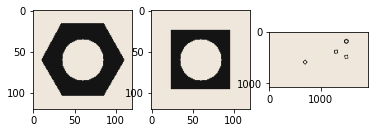

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

1. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

Thershold value for hexnut_template = 116.0
Thershold value for quarenut_template = 116.0
Thershold value for conveyor_f100 = 128.0


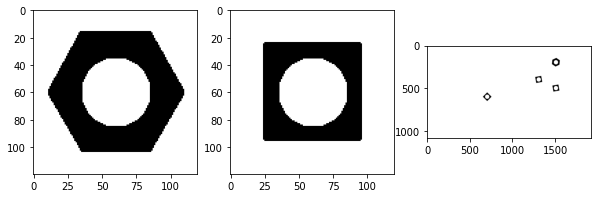

In [3]:
# Your code here.

gray_images = []
blurred_images = []
binarized_images = []
threshold_values =[]
images = [hexnut_template, squarenut_template, conveyor_f100]
image_names = ["hexnut_template", "quarenut_template", "conveyor_f100"]

# get the gray scale images
for i in range(0, 3):
    gray_images.append(cv.cvtColor(images[i], cv.COLOR_BGR2GRAY))

# convert above images using otsu binarization and gaussian blur used to filter he nois
for i in range(0, 3):
    blurred_images.append(cv.GaussianBlur(gray_images[i], (5,5), 0))

fig, ax = plt.subplots(1,3, figsize = (10, 10))

for i in range(0, 3):
    threshold_values.append(cv.threshold(blurred_images[i], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[0])
    binarized_images.append(cv.threshold(blurred_images[i], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1])
    print("Thershold value for " + image_names[i] + " = " + str(threshold_values[i]))
    ax[i].imshow(cv.cvtColor(binarized_images[i], cv.COLOR_GRAY2RGB))

plt.show()

1. Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

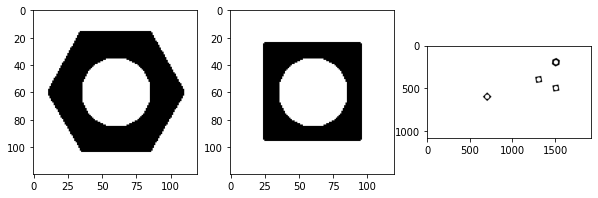

In [4]:
# Your code here.

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

closing_images =[]
kernel = np.ones((3,3),np.uint8)

fig, ax = plt.subplots(1,3, figsize = (10, 10))

#remove small holes inside the foreground using morphological closing method
for i in range(0, 3):
    closing_images.append(cv.morphologyEx(binarized_images[i], cv.MORPH_CLOSE, kernel))
    ax[i].imshow(cv.cvtColor(closing_images[i], cv.COLOR_GRAY2RGB))

plt.show()

1. Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions

How many connected components are detected in each image?
What are the statistics? Interpret these statistics.
What are the centroids?
For the hexnut template, you should get the object area in pixel as approximately 4728.

3 components are detected in hexnut_template
3 components are detected in quarenut_template
6 components are detected in conveyor_f100


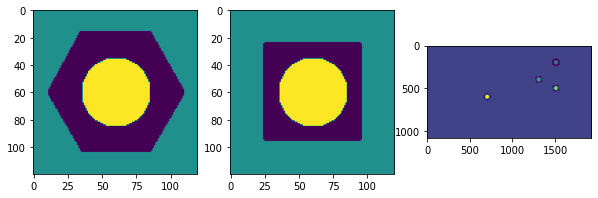

In [5]:
# Your code here.

import cv2 as cv
import numpy as np
import matplotlib.pyplot as pltl

num_labels = []
labels = []
stats = []
centroids = []
connectivity = 4

fig, ax = plt.subplots(1, 3, figsize = (10,10))

for i in range(0, 3):
    num_labels.append(cv.connectedComponentsWithStats(closing_images[i] , connectivity , cv.CV_32S)[0])
    labels.append(cv.connectedComponentsWithStats(closing_images[i] , connectivity , cv.CV_32S)[1])
    stats.append(cv.connectedComponentsWithStats(closing_images[i] , connectivity , cv.CV_32S)[2])
    centroids.append(cv.connectedComponentsWithStats(closing_images[i] , connectivity , cv.CV_32S)[3])

    print(num_labels[i] ,"components are detected in", image_names[i])
    # print(stats[i])
    # print(centroids[i])
    ax[i].imshow(labels[i])
    
plt.show()

# <font color='blue'>what are the Statistics?</font>
<font color='green'>Statistics matrix of hexnut_template image</font>
$$\begin{bmatrix} 11 & 16 & 99 & 88 & 4726 \\ 0 & 0 & 120 & 120 & 7717 \\ 36 & 36 & 49 & 49 & 1957 \end{bmatrix}$$

<font color='green'>Statistics matrix of squarenut_template image</font>
$$\begin{bmatrix} 24 & 24 & 72 & 72 & 3223 \\ 0 & 0 & 120 & 120 & 9220 \\ 36 & 36 & 49 & 49 & 1957 \end{bmatrix}$$

<font color='green'>Statistics matrix of conveyor_f100 image</font>
$$\begin{bmatrix} 651 & 151 & 895 & 499 & 13922 \\ 0 & 0 & 1920 & 1080 & 2051850 \\ 1476 & 176 & 49 & 49 & 1957 \\ 1276 & 376 & 49 & 49 & 1957 \\ 1476 & 476 & 49 & 49 & 1957 \\ 676 & 576 & 49 & 49 & 1957 \end{bmatrix}$$



# interpretation of Statistics 
Statistics means it contain connected components bounding box coordinates and the area (in pixels) of the bounding box. 

# <font color='blue'>what are the Centroids?</font>
<font color='green'>Centroids matrix of hexnut_template image</font>
$$\begin{bmatrix} 59.83368599 & 59.22323318 \\ 59.168848 & 59.54269794 \\ 60. & 60.\end{bmatrix}$$

<font color='green'>Centroids matrix of squarenut_template image</font>
$$\begin{bmatrix} 59.19640087 & 59.19640087 \\ 59.5 & 59.5 \\ 60. & 60. \end{bmatrix}$$

<font color='green'>Centroids matrix of conveyor_f100 image</font>
$$\begin{bmatrix} 1274.77776182 & 400.05430254 \\ 956.25252528 & 540.88298072 \\ 1500. & 200. \\ 1300. & 400. \\ 1500. &  500. \\  700. & 600. \end{bmatrix}$$


1. Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.
Display these contours. You should see something like the following:

extreme_outer_contours

4996.0
4903.0
4903.0
6456.0


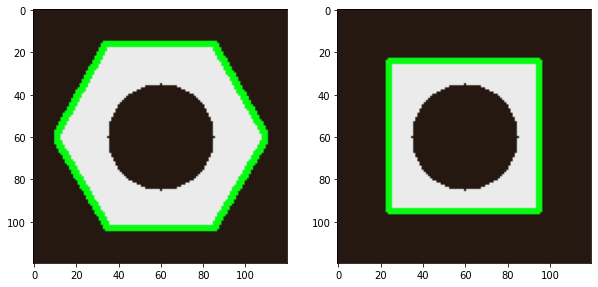

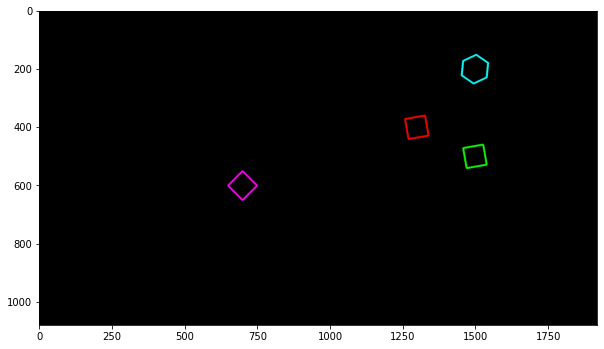

In [18]:
# Your code here.

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random

contours = []
hierarchy = []
outer_contours_hexnut = []
outer_contours_squarenut = []
outer_contours = []
invert_img = []
colors = [(249,4,238),(17,238,15),(231,6,5),(14,247,247)]


black_img = np.zeros((np.shape(images[2])[0],np.shape(images[2])[1] , 1), dtype = "uint8")
black_img = cv.cvtColor(black_img, cv.COLOR_BGR2RGB)

for i in binarized_images:
    invert_img.append(cv.bitwise_not(i))


for i in invert_img:
    contours.append(cv.findContours(i, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0])
    hierarchy.append(cv.findContours(i, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[1])

fig, ax = plt.subplots(1,2,figsize = (10,10))

for i in range(0, len(contours[0])):
    area = cv.contourArea(contours[0][i])
    if area > 6000:
        cv.drawContours(images[0], contours[0], i, colors[i], 2)
        outer_contours_hexnut.append(contours[0][i])
for i in range(0, len(contours[1])):
    area = cv.contourArea(contours[1][i])
    if area > 5000:
        cv.drawContours(images[1], contours[1], i, colors[i], 2)
        outer_contours_squarenut.append(contours[1][i])
for i in range(0, len(contours[2])):
    area = cv.contourArea(contours[2][i])
    if area > 4000:
        print(area)   
        cv.drawContours(black_img, contours[2], i, colors[i], 5)
        outer_contours.append(contours[2][i])
for i in range(0, 2):
    ax[i].imshow(cv.bitwise_not(images[i]))

fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(black_img)
 
plt.show()


# Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

1. Open the sequence and play it using the code below.

In [7]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []
     
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)
    

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()


Can't receive frame (stream end?). Exiting.


In [8]:
# Your code here.
import cv2 as cv
import numpy as np

ret =[]
cnt1 = outer_contours_hexnut
cnt2 = outer_contours
count = 0
for i in cnt2:
    if (cv.matchShapes(cnt1[0],i,1,0.0)) < 0.02:
        ret.append(cv.matchShapes(cnt1[0],i,1,0.0))

print(len(ret),'matching hexagonal nuts in conveyor_f100.png')
print(ret)

1 matching hexagonal nuts in conveyor_f100.png
[0.00014926196343134635]


1. Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.
1. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [32]:
# Yor code here.
import cv2 as cv
def object_count(frame, frame_name,):
    global total
    current_count = 0
    left_centers = []
    right_centers = []
    frame_contours = []

    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray, (5,5), 0)
    _,thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU) 
    bitnot_img = cv.bitwise_not(thresh)
    contours, hierarchy = cv.findContours(bitnot_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    for i in range(0, len(contours)):
        area = cv.contourArea(contours[i])
        if area > 4500 and area < 7000:
            frame_contours.append(contours[i])
    
    for i in frame_contours:
        M = cv.moments(i)
        cx = int(M['m10']/M['m00'])

        if (1000-cx) >= 0:
            left_centers.append(cx)
        else:
            right_centers.append(cx)
    for i in left_centers:
        if 1000-i < 10:
            current_count+= 1
            total+= 1
    
    text1 = 'Frame:' + str(frame_name)
    text2 = 'Current count of objects:' + str(current_count)
    text3 = 'Total counts of objects:' + str(total)
    cv.putText(frame,text1 , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,text2 , (100, 130), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,text3 , (100, 160), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)

    return frame

# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here
total = 0
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []
     
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    frame_array.append(object_count(frame, f))

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
